<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Imad/Charlotte311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://www.commonapp.org/static/90a1fb37e395b1adc32f28236052d416/university-north-carolina-charlotte_959.jpg'>



## PROJECT: Charlotte 311 Service Requests
## DSBA 6162


**Charlotte 311 Calls** has been dowloaded from the [Charlotte Open Data portal](https://data.charlottenc.gov/datasets/service-requests-311/explore)

In this notebook, I will be importing the above data and GIS map data from my Google Drive. **GIS and Census data** come from the [Census Reporter](https://censusreporter.org/) website.

**Other data and GIS resources:**


1.   [Open Maps](http://maps.co.mecklenburg.nc.us/openmapping/data.html)
2.   [Census Blocks](https://www.census.gov/newsroom/blogs/random-samplings/2011/07/what-are-census-blocks.html)
3. [Geopandas in CoLab](https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=6pMKuuyNMnwv)
4. [Medium Article](https://ecyy.medium.com/mapping-gis-data-on-a-basemap-by-contextily-in-colab-dfff5837eec): Using GIS data in python
5. [UCLA Workshop on GeoPandas](https://github.com/yohman/getting-started-with-gis)








In [ ]:
# Import Numpy
import numpy as np

# Import Pandas
import pandas as pd

# Import Random
import random

# to read and visualize spatial data
# ! pip install geopandas
import geopandas as gpd

# ! pip install contextily
import contextily as ctx

# ! pip install descartes
import descartes

# to add the geometry use:
from shapely.geometry import Point, Polygon


# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# Import Seaborn for plotting
import seaborn as sns

plt.style.use('ggplot')


### 1) Importing the data file from Google drive.

In [ ]:
# Import Data

from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/Service_Requests_311.csv')


### 2) Taking a look at the our data

In [ ]:
# Taking a look at the data
df.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [ ]:
# More exploration
# Lets take a look at how each variable is stored
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION               45672 non-null    object 
 1

In [ ]:
# Lets check the Value Counts for 311 Requests
df['REQUEST_TYPE'].value_counts().head(30).sort_values(ascending=False)

NON_RECYCLABLE ITEMS         831737
RECYCLABLE ITEMS             199452
HNS HEALTH AND SANITATION     85031
CART REPAIR-GARBAGE           36541
MISSED RECYCLING              27471
SW DOCUMENT GARBAGE           26729
311 DOCUMENT                  25395
CDOT STREETLIGHT REPAIR       19216
SW DOCUMENT RECYCLING         17932
DEAD ANIMAL COLLECTION        16727
CART ISSUE/MISSING CART       15121
TIRES                         13577
SW DOCUMENT YARD WASTE        13186
CART DELIVERY RECYCLING       11835
COMPLAINT                     11788
ZONING/COMPLAINT/ INSPECT     11767
CART(S) DEL- NEW BUILD        11324
CART ONLY DELIVER-GARB        11235
CART REPAIR-RECYCLE            9933
ZON GENERAL INFO  INQUIRY      9805
CDOT POTHOLE REPAIR            9416
HNS HOUSING                    8405
CART PURCHASE 2ND-GARBAGE      8077
MISSED GARBAGE                 7330
CDOT STREET SIGN REP/REPL      7260
PARKING ON LAWN WORKDAYS       6956
STREET SWEEPING/FLUSHING       6824
GRAFFITI                    

In [ ]:
# Checking the full list of Request Types
df['REQUEST_TYPE'].unique().tolist()

['NON_RECYCLABLE ITEMS',
 'UTILITY VERIFICATION LTR',
 'MISSED RECYCLING',
 'CITIZEN FEEDBACK',
 'CWP REQUEST',
 'RECYCLABLE ITEMS',
 'CART REPAIR-GARBAGE',
 '311 DOCUMENT',
 'HNS HEALTH AND SANITATION',
 'ZON DAYCARE/CHILDCARE INQ',
 'CDOT STREETLIGHT REPAIR',
 'ZON SIGNS INQUIRY',
 'CART ISSUE/MISSING CART',
 'CART(S) DEL- NEW BUILD',
 'CART REPAIR-RECYCLE',
 'CDOT STREET SIGN REP/REPL',
 'SW DOCUMENT BULKY ITEMS',
 'TIRES',
 'LANDSCAPE TREES',
 'CART DELIVERY RECYCLING',
 'TAX BILL INQUIRY',
 'CART PURCHASE 2ND-GARBAGE',
 'FIELD OBSERVED PROBLEM',
 'SW DOCUMENT YARD WASTE',
 'LITTER/DEBRIS IN STREET',
 'SWS CART SHIPMT REVIEW',
 'ZONGROUP/BOARDING HOMES',
 'INVALID/NEW SW ADDRESS',
 'FLOODING',
 'SW DOCUMENT GARBAGE',
 'DEAD ANIMAL COLLECTION',
 'SW DOCUMENT RECYCLING',
 'ZON RESIDENTIAL PERMITS',
 'INVESTIGATE/CONTACT RECY',
 'HNS HOUSING',
 'CART ONLY DELIVER-GARB',
 'CART PURCHASE 2ND-RECYCLE',
 'CDOT TRAF SIGNAL TIMING',
 'CART PICKUP-RECYCLE',
 '3-1-1 ESCALATION REQUEST',
 'CDO

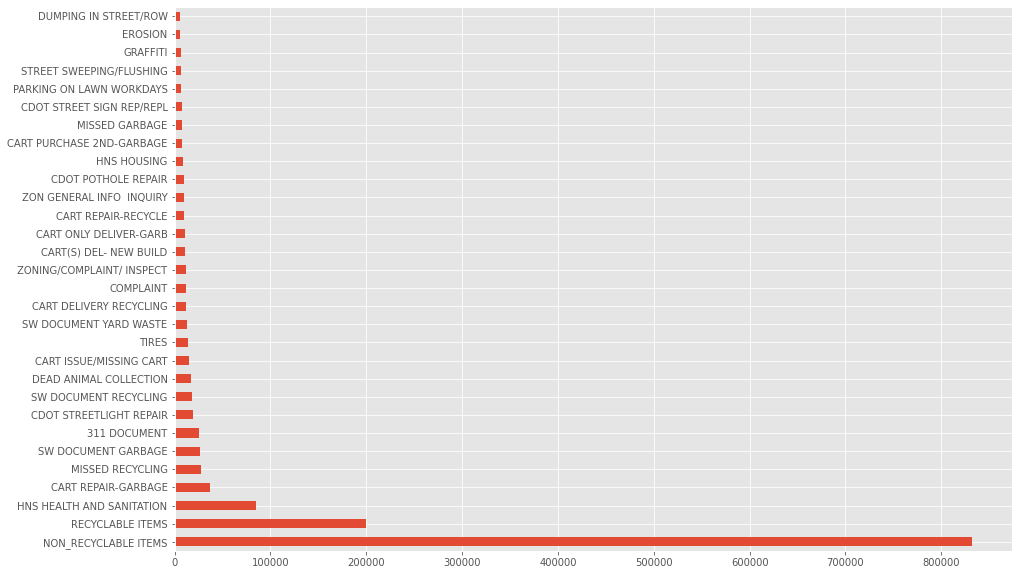

In [ ]:
# Create barplot of the top 30 Request types
df['REQUEST_TYPE'].value_counts().head(30).plot(kind='barh', figsize=(15,10))

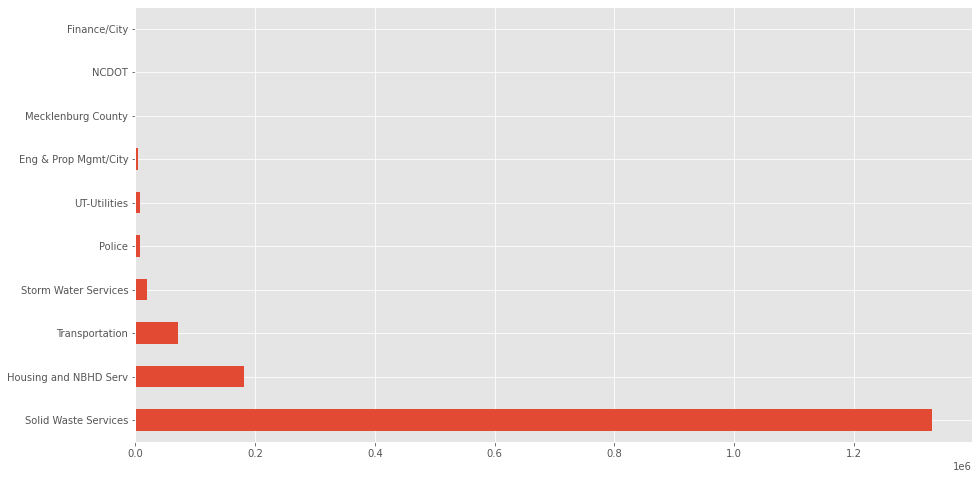

In [ ]:
# create barplot of the departments involved in 'Request types'
df['DEPARTMENT'].value_counts().head(10).plot(kind='barh', figsize=(15,8))

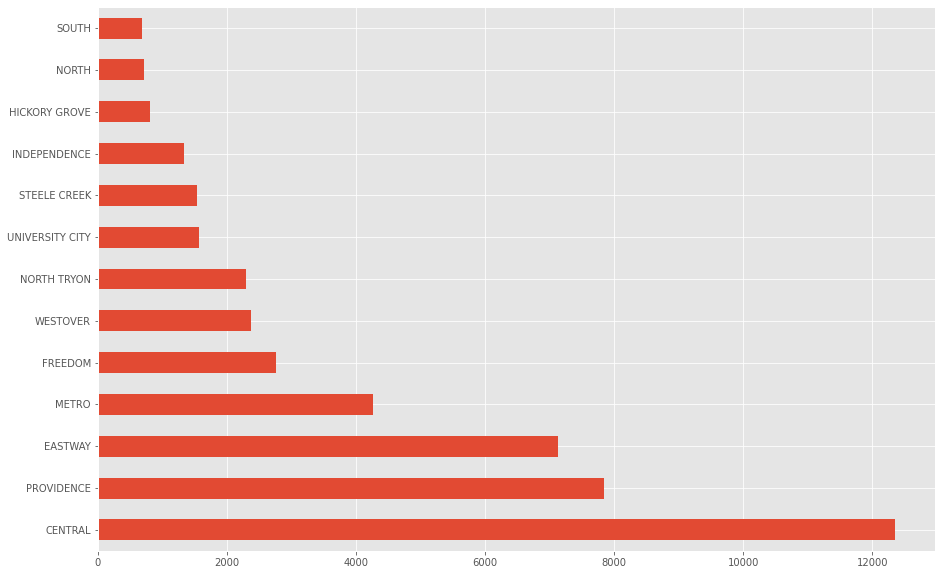

In [ ]:
# Barplot of CMPD divisions in relation to request types
df['CMPD_DIVISION'].value_counts().head(30).plot(kind='barh', figsize=(15,10))

**WHAT IS GEOID: it is an FIPS code**

    [FIPS](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html)

<br> Ignore 14000 US - it just means the type of Census Data</br>
<br>**The first 2 digits** = State = 37 For NC</br>
<br>**The next 3 digits** = County = 119 for Mecklenburg County</br>
<br>**The next 6 digits** = Tract - which can be further divided into "Block Groups" - and those are divided into "Blocks"</br>
<br>T**he last digit** = Block Number</br>


## **BLOCK GROUPS EXPERIMENT**

<br> Bringing in data from the US Census on Mecklenburg county Block Groups</br>

In [ ]:
# population block group data from census reporter
bg = gpd.read_file('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/block_groups/acs2019_5yr_B01003_15000US371190057131.geojson')

In [ ]:
bg.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,05000US37119,"Mecklenburg County, NC",1074475.0,0.0,"MULTIPOLYGON (((-80.75291 35.41560, -80.75241 ..."
1,15000US371190001001,"Block Group 1, Mecklenburg, NC",1714.0,278.0,"MULTIPOLYGON (((-80.85519 35.22279, -80.85444 ..."
2,15000US371190001002,"Block Group 2, Mecklenburg, NC",2095.0,315.0,"MULTIPOLYGON (((-80.84843 35.23180, -80.84739 ..."
3,15000US371190001003,"Block Group 3, Mecklenburg, NC",1270.0,286.0,"MULTIPOLYGON (((-80.84507 35.22902, -80.84448 ..."
4,15000US371190001004,"Block Group 4, Mecklenburg, NC",83.0,81.0,"MULTIPOLYGON (((-80.84226 35.22777, -80.84194 ..."


In [ ]:
# trim the data - getting rid of the 'error' column
bg = bg[['geoid','B01003001','geometry']]

# rename the columns
bg.columns = ['FIPS','TotalPop','geometry']

In [ ]:
bg.tail()

,FIPS,TotalPop,geometry
551,15000US371190064071,1420.0,"MULTIPOLYGON (((-80.86861 35.45820, -80.86726 ..."
552,15000US371190064072,2587.0,"MULTIPOLYGON (((-80.86659 35.44755, -80.86649 ..."
553,15000US371199801001,0.0,"MULTIPOLYGON (((-80.97112 35.22719, -80.97104 ..."
554,15000US371199802001,0.0,"MULTIPOLYGON (((-80.95757 35.09339, -80.95738 ..."
555,15000US371199803001,28.0,"MULTIPOLYGON (((-80.84358 35.21911, -80.84200 ..."


In [ ]:
# fix FIPS code - removing the first part '15000US' is of no value
bg['FIPS'] = bg['FIPS'].str.replace('15000US','')
bg.tail()

,FIPS,TotalPop,geometry
551,371190064071,1420.0,"MULTIPOLYGON (((-80.86861 35.45820, -80.86726 ..."
552,371190064072,2587.0,"MULTIPOLYGON (((-80.86659 35.44755, -80.86649 ..."
553,371199801001,0.0,"MULTIPOLYGON (((-80.97112 35.22719, -80.97104 ..."
554,371199802001,0.0,"MULTIPOLYGON (((-80.95757 35.09339, -80.95738 ..."
555,371199803001,28.0,"MULTIPOLYGON (((-80.84358 35.21911, -80.84200 ..."


In [ ]:
# sort by total pop - looking for 0 population zones
bg.sort_values(by='TotalPop').head(20)

,FIPS,TotalPop,geometry
554,371199802001,0.0,"MULTIPOLYGON (((-80.95757 35.09339, -80.95738 ..."
553,371199801001,0.0,"MULTIPOLYGON (((-80.97112 35.22719, -80.97104 ..."
555,371199803001,28.0,"MULTIPOLYGON (((-80.84358 35.21911, -80.84200 ..."
351,371190056172,31.0,"MULTIPOLYGON (((-80.71040 35.23284, -80.71038 ..."
4,371190001004,83.0,"MULTIPOLYGON (((-80.84226 35.22777, -80.84194 ..."
215,371190038023,112.0,"MULTIPOLYGON (((-80.89467 35.19242, -80.89452 ..."
272,371190053051,294.0,"MULTIPOLYGON (((-80.79489 35.26672, -80.79487 ..."
416,371190058313,328.0,"MULTIPOLYGON (((-80.85309 35.08633, -80.85309 ..."
75,371190019123,335.0,"MULTIPOLYGON (((-80.73666 35.22608, -80.73662 ..."
63,371190018012,353.0,"MULTIPOLYGON (((-80.80725 35.20432, -80.80645 ..."


In [ ]:
# delete less than 100 population geographies - trying to stick to 'populated areas'
bg = bg[bg['TotalPop']>100]

In [ ]:
# get the layers into a web mercator projection
# reproject to web mercator
gdf = gdf.to_crs(epsg=3857)

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


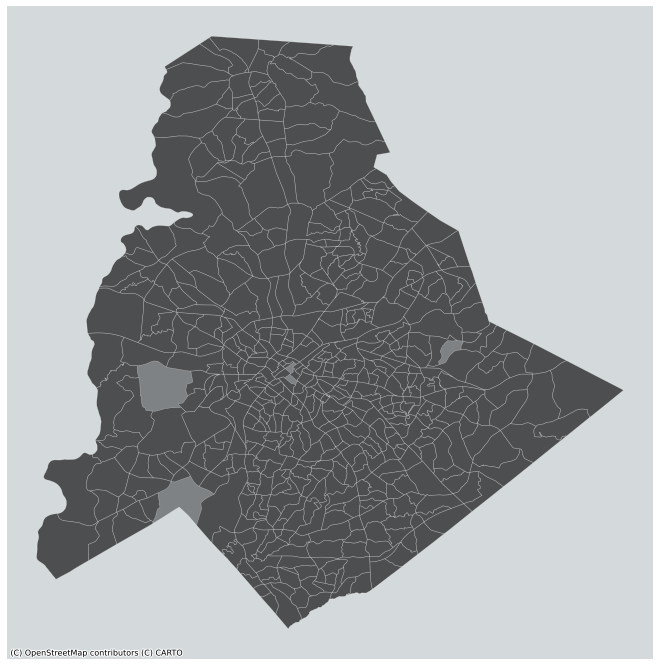

In [ ]:
# Checking out what the plot looks like
fig, ax = plt.subplots(figsize=(12,12))

bg.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## **CONVERT OUR 311 CALL DATA TO A GEO PANDAS DATAFRAME** 
<br> Here we are going to create a 'geometry' column and link it to the above shapefile that contains the 'block groups' for Mecklenburg County

### **Coordinate systems and Projections**

Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geodataframes has .crs attribute that can give you the original CRS used in the data. It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let us check them.

In [ ]:
# convert our 311 calls dataframe (called df) into a geodataframe - i have renamed this dataframe to three11  
# basically we need to roject and set a Coordinate reference systems (CRS).	Since we already have Longitude and Latitude in our 311 data set, we are good to go
three11 = gpd.GeoDataFrame(df, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [ ]:
# get the layers into a web mercator projection
# reproject to web mercator
three11 = three11.to_crs(epsg=3857)

In [ ]:
# convert lat/lon to floats
three11.LONGITUDE = three11.LONGITUDE.astype('float')
three11.LATITUDE = three11.LATITUDE.astype('float')

In [ ]:
# drop the unmapped rows - anything that has a longitude of 0 should be removed
three11 = three11[three11.LONGITUDE!=0]

## **SETUP of the 311 Calls data is complete.** 

<br> We can filter our 311 data set and decide what we want to see mapped

In [ ]:
# Dropping some columns
three11.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape,geometry
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN,POINT (-8995960.576 4181894.353)
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN,POINT (-8992604.539 4211602.678)
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN,POINT (-8991397.030 4202359.303)
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN,POINT (-9003556.856 4204417.487)
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN,POINT (nan nan)


In [ ]:
list(three11)

['X',
 'Y',
 'OBJECTID',
 'DEPARTMENT',
 'DIVISION',
 'REQUEST_NO',
 'FISCAL_YEAR',
 'FISCAL_MONTH',
 'REQUEST_TYPE',
 'RECEIVED_DATE',
 'INTERNAL_FIELD_OBSERVATION',
 'TITLE',
 'CMPD_DIVISION',
 'NEIGHBORHOOD_PROFILE_AREA',
 'BLOCK_NO',
 'STREET_DIRECTION',
 'STREET_NAME',
 'STREET_TYPE',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'FULL_ADDRESS',
 'X_COORD',
 'Y_COORD',
 'LATITUDE',
 'LONGITUDE',
 'COUNCIL_DISTRICT',
 'GlobalID',
 'PID',
 'Shape',
 'geometry']

In [ ]:
# create a list of columns to keep
columns_to_keep =  ['OBJECTID',
                    'DEPARTMENT',
                    'DIVISION',
                    'REQUEST_NO',
                    'FISCAL_YEAR',
                    'FISCAL_MONTH',
                    'REQUEST_TYPE',
                    'CMPD_DIVISION',
                    'FULL_ADDRESS',
                    'LATITUDE',
                    'LONGITUDE',
                    'geometry']

In [ ]:
# redefine gdf with only columns to keep
three11 = three11[columns_to_keep]

In [ ]:
three11.head()

,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,CMPD_DIVISION,FULL_ADDRESS,LATITUDE,LONGITUDE,geometry
0,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,NaN,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",35.132444,-80.812089,POINT (-8995960.576 4181894.353)
1,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,NaN,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",35.350408,-80.781941,POINT (-8992604.539 4211602.678)
2,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,NaN,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",35.282654,-80.771094,POINT (-8991397.030 4202359.303)
3,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,NaN,"1801 CRANDON DR, CHARLOTTE, NC 28216",35.297745,-80.880327,POINT (-9003556.856 4204417.487)
4,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,POINT (nan nan)


## **Experimenting with filtering Request Type**

In [ ]:
# Top 30 311 Requests
top_30 = three11['REQUEST_TYPE'].value_counts().head(30).sort_values(ascending=False)
print(top_30)

NON_RECYCLABLE ITEMS         831737
RECYCLABLE ITEMS             199452
HNS HEALTH AND SANITATION     85031
CART REPAIR-GARBAGE           36541
MISSED RECYCLING              27471
SW DOCUMENT GARBAGE           26729
311 DOCUMENT                  25395
CDOT STREETLIGHT REPAIR       19216
SW DOCUMENT RECYCLING         17932
DEAD ANIMAL COLLECTION        16727
CART ISSUE/MISSING CART       15121
TIRES                         13577
SW DOCUMENT YARD WASTE        13186
CART DELIVERY RECYCLING       11835
COMPLAINT                     11788
ZONING/COMPLAINT/ INSPECT     11767
CART(S) DEL- NEW BUILD        11324
CART ONLY DELIVER-GARB        11235
CART REPAIR-RECYCLE            9933
ZON GENERAL INFO  INQUIRY      9805
CDOT POTHOLE REPAIR            9416
HNS HOUSING                    8405
CART PURCHASE 2ND-GARBAGE      8077
MISSED GARBAGE                 7330
CDOT STREET SIGN REP/REPL      7260
PARKING ON LAWN WORKDAYS       6956
STREET SWEEPING/FLUSHING       6824
GRAFFITI                    

In [ ]:
# Filtering all Pot Hole repair requests
pot_holes = (three11['REQUEST_TYPE'] == 'CDOT POTHOLE REPAIR')

# We can view the filtered results by:
# three11[pot_holes]

# OR

# Use .loc - after the first argument (which is the filter), we can specify what columns we want to be returned
test_var = three11.loc[pot_holes, 'geometry']

In [ ]:
# get the bounding box coordinates for the 311 calls data
minx, miny, maxx, maxy = three11.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-9525418.599981772
-8468225.167131705
4165553.123583153
4234558.9243391985


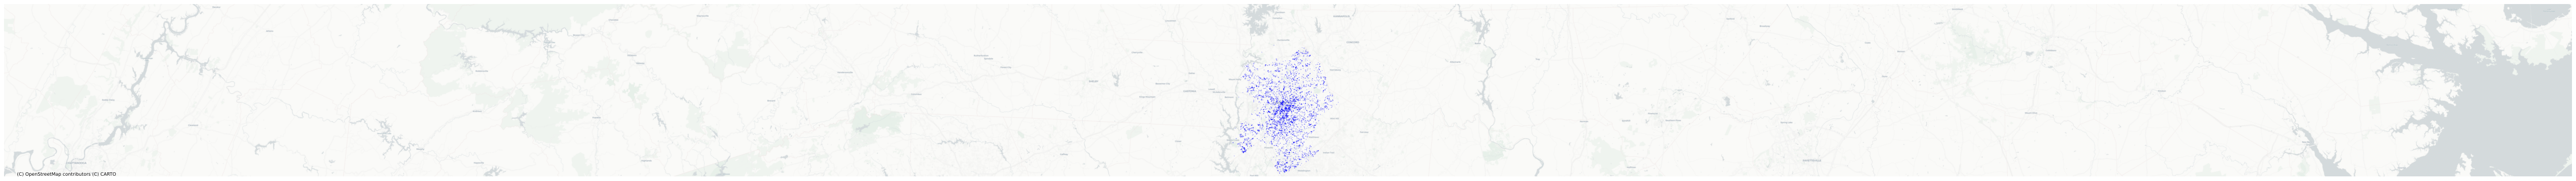

In [104]:
# Testing mapping

# set up the plot canvas with plt.subplots in one column, one row
fig, ax = plt.subplots(1,1,figsize=(80, 80))

# block groups GeoPandas Frame is called 'bg'
bg.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# Potholes
test_var.plot(ax=ax, # this also puts it in the same ax plot
              color='blue',
              markersize=1,
              alpha=0.2)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)